<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
         DRUG PERFORMANCE EVALUATION                                                                
    </h2>
</div>

<h1 style='text-align: center;'>  Drug-Performance-Evaluation dataset </h1>

     The purpose of this project is to evaluate the level of effectiveness of drugs .
     In this notebook we'll take a look at this dataset, clean it and finally create a basic medicine recomendation system and predict the level of effectiveness of drugs . 

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Importing the libraries
    </h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Getting data
    </h2>
</div>

In [2]:
df=pd.read_csv('Drug_clean.csv')

In [3]:
df

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX
...,...,...,...,...,...,...,...,...,...,...
680,vulvovaginal candidiasis,Miconazole Nitrate,3.465000,2.770000,Cream,On Label,13.990000,19.500000,2.345000,RX/OTC
681,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.750000,3.000000,Cream,On Label,13.990000,4.000000,3.000000,OTC
682,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.000000,1.000000,Other,On Label,125.990000,1.000000,1.000000,OTC
683,vulvovaginal candidiasis,Terconazole,3.525000,3.047500,Cream,On Label,68.990000,20.000000,2.717500,RX


# OBSERVATION

## The dataset contains performance metrics for 37 common conditions, including drug name, type, form, average price, reviews, effectiveness, ease of use, and satisfaction

    Condition: The medical condition associated with the drug. (String)
    Drug: The name of the drug. (String)
    Indication: The purpose of the drug. (String)
    Type: The type of drug (generic or brand). (String)
    Reviews: The number of reviews associated with the drug. (Integer)
    Effective: The effectiveness of the drug based on customer reviews. (Integer)
    EaseOfUse: The ease of use of the drug based on customer reviews. (Integer)
    Satisfaction: The satisfaction level of the drug based on customer reviews. (Integer)

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Explore the dataset using EDA
    </h2>
</div> 

In [4]:
df.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


In [5]:
df.tail()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
680,vulvovaginal candidiasis,Miconazole Nitrate,3.4650,2.7700,Cream,On Label,13.99,19.5,2.3450,RX/OTC
681,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.7500,3.0000,Cream,On Label,13.99,4.0,3.0000,OTC
682,vulvovaginal candidiasis,Miconazole-Skin Clnsr17,4.0000,1.0000,Other,On Label,125.99,1.0,1.0000,OTC
683,vulvovaginal candidiasis,Terconazole,3.5250,3.0475,Cream,On Label,68.99,20.0,2.7175,RX
684,vulvovaginal candidiasis,Tioconazole,3.8525,2.0225,Other,On Label,22.99,145.0,1.8275,OTC


In [6]:
df.shape

(685, 10)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EaseOfUse,685.0,3.920038,0.894212,1.0,3.556667,4.050000,4.50000,5.00
Effective,685.0,3.523530,0.954126,1.0,3.000000,3.600000,4.11000,5.00
Price,685.0,174.211183,667.743466,4.0,15.490000,49.990000,145.99000,10362.19
Reviews,685.0,82.644410,273.281398,1.0,3.000000,10.350877,57.00000,4647.00
Satisfaction,685.0,3.195699,1.030442,1.0,2.575000,3.200000,3.90125,5.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     685 non-null    object 
 1   Drug          685 non-null    object 
 2   EaseOfUse     685 non-null    float64
 3   Effective     685 non-null    float64
 4   Form          685 non-null    object 
 5   Indication    685 non-null    object 
 6   Price         685 non-null    float64
 7   Reviews       685 non-null    float64
 8   Satisfaction  685 non-null    float64
 9   Type          685 non-null    object 
dtypes: float64(5), object(5)
memory usage: 53.6+ KB


In [9]:
df.corr()

,EaseOfUse,Effective,Price,Reviews,Satisfaction
EaseOfUse,1.000000,0.659237,-0.107480,0.011962,0.650156
Effective,0.659237,1.000000,-0.017532,-0.035802,0.864863
Price,-0.107480,-0.017532,1.000000,-0.024927,-0.024800
Reviews,0.011962,-0.035802,-0.024927,1.000000,-0.084216
Satisfaction,0.650156,0.864863,-0.024800,-0.084216,1.000000


In [10]:
df[(df['Price']>2000) & (df['Form']=='Tablet')]

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
176,adenocarcinoma of pancreas,Capecitabine,4.14,3.75,Tablet,Off Label,5829.19,83.0,3.685,RX


<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Checking the missing values
    </h2>
</div>

In [11]:
df.isnull().sum()

Condition       0
Drug            0
EaseOfUse       0
Effective       0
Form            0
Indication      0
Price           0
Reviews         0
Satisfaction    0
Type            0
dtype: int64

In [12]:
df.duplicated().sum()

0

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Univariate Analysis
    </h2>
</div>

In [13]:
df.columns

Index(['Condition', 'Drug', 'EaseOfUse', 'Effective', 'Form', 'Indication',
       'Price', 'Reviews', 'Satisfaction', 'Type'],
      dtype='object')

## HISTOGRAM

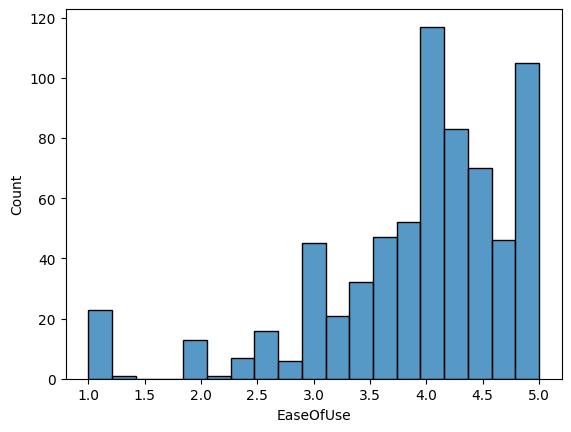

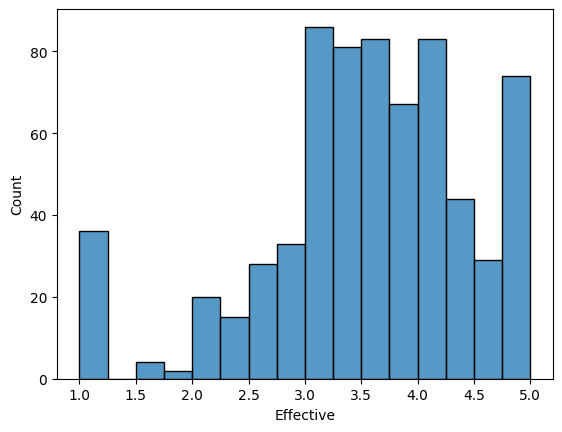

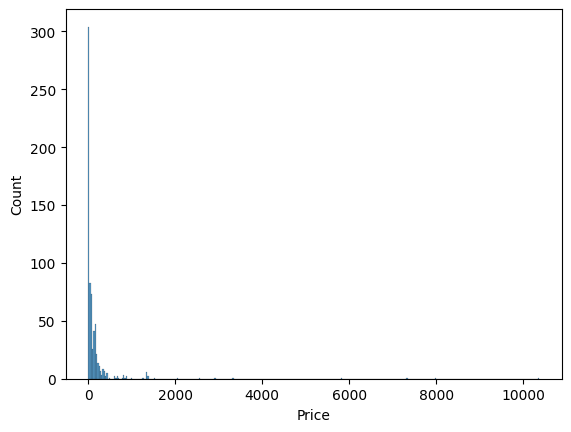

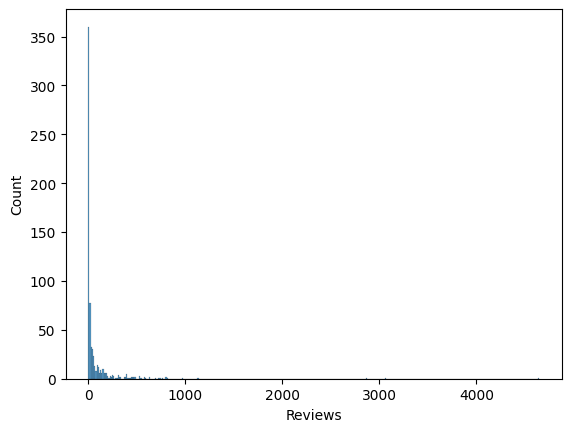

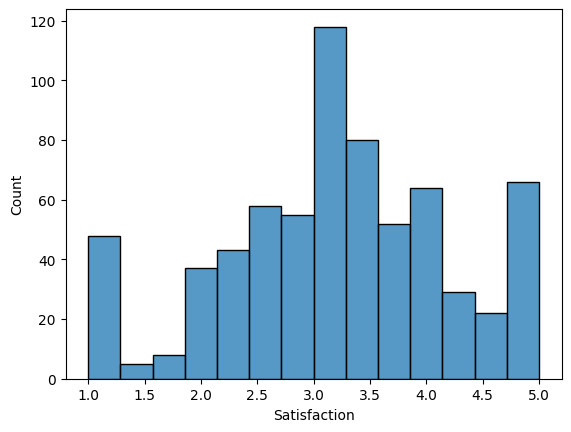

In [14]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show()

## KDEPLOT

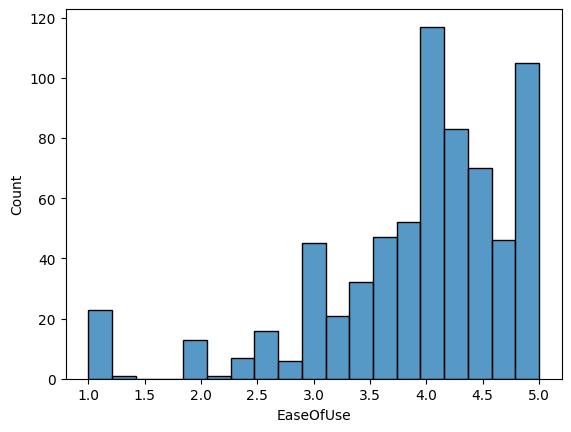

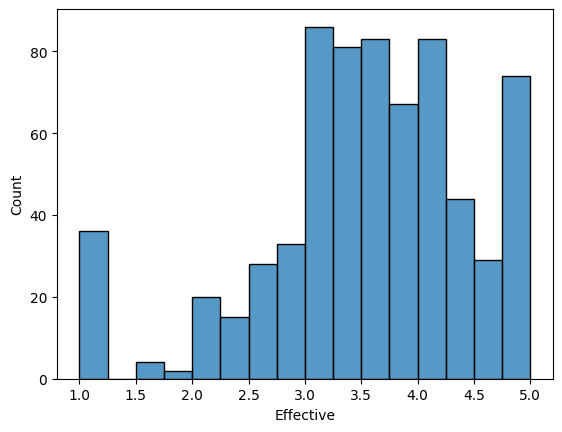

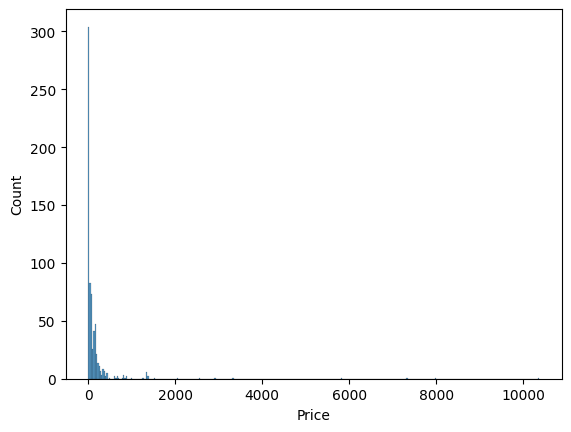

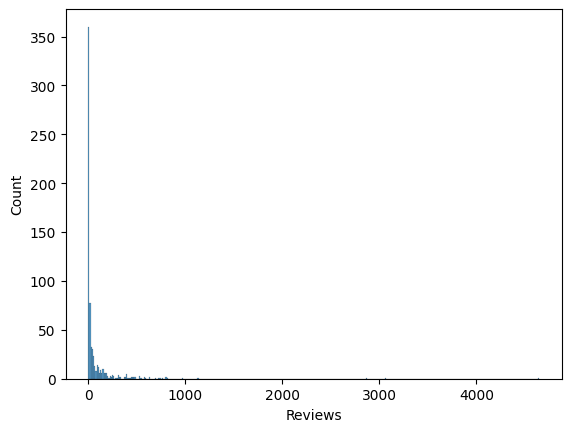

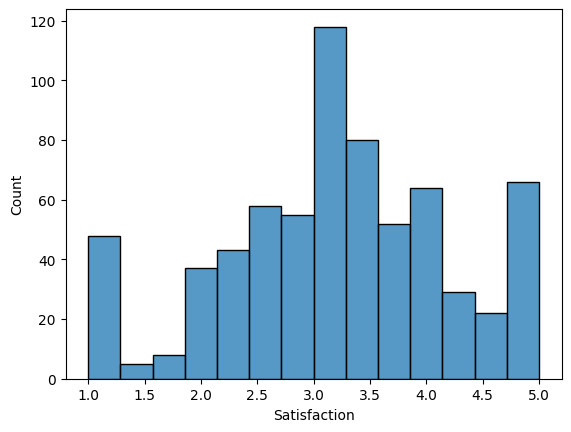

In [15]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show()

## COUNTPLOT

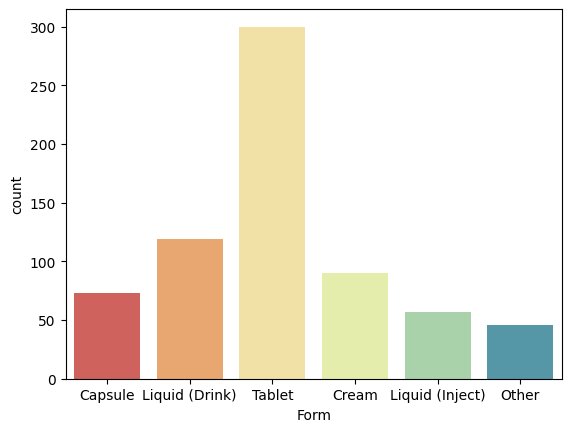

In [16]:
sns.countplot(x='Form',data=df,palette='Spectral');

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Outlier Treatment
    </h2>
</div>

## BOXPLOT

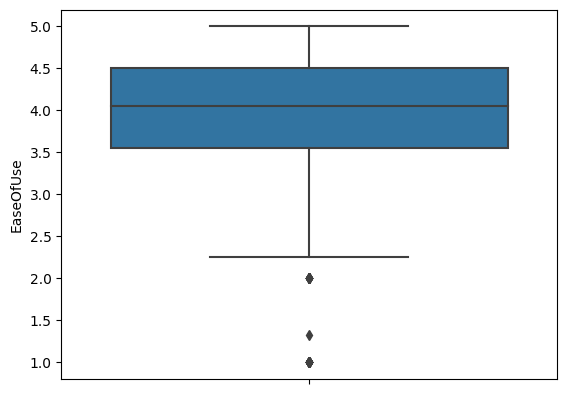

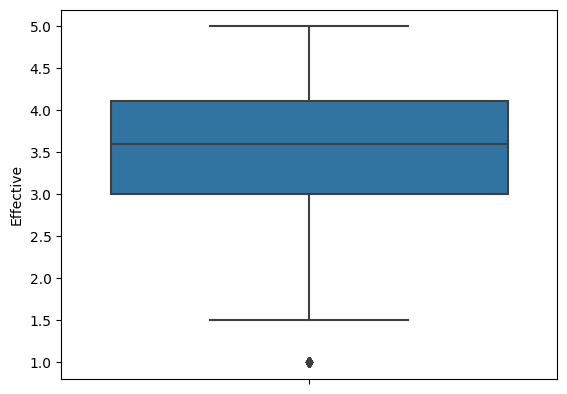

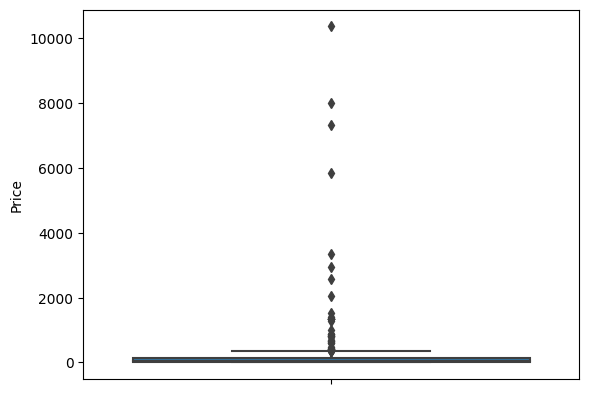

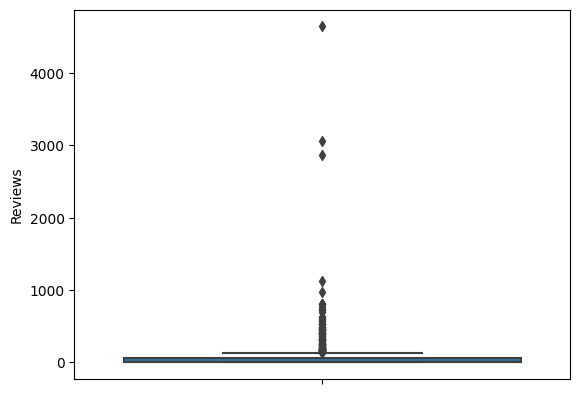

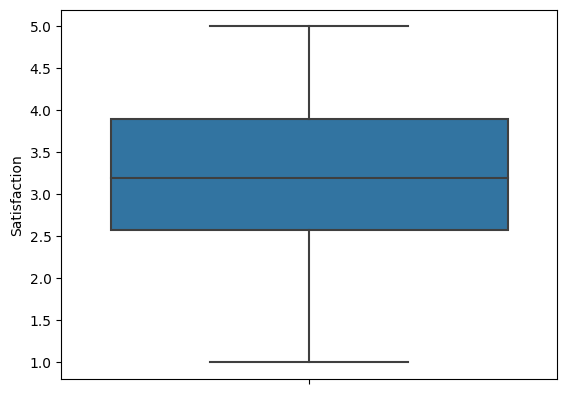

In [17]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

In [18]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [19]:
for column in df.columns:
    if df[column].dtype !="object":
        UL,LL = outlier_limit(df[column])
        df[column]=np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])  

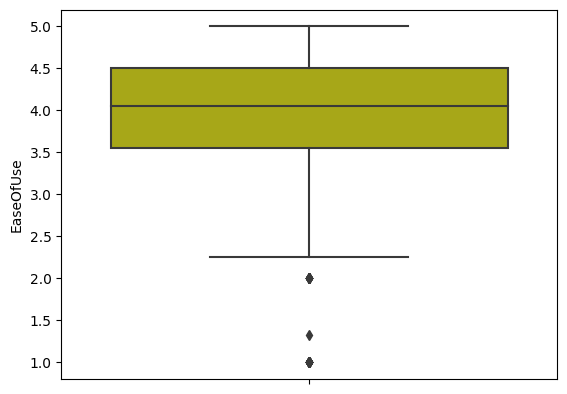

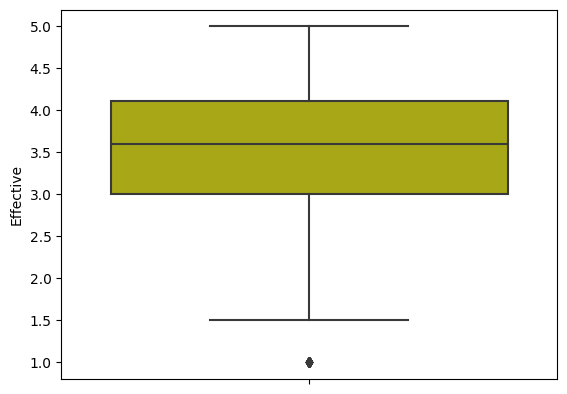

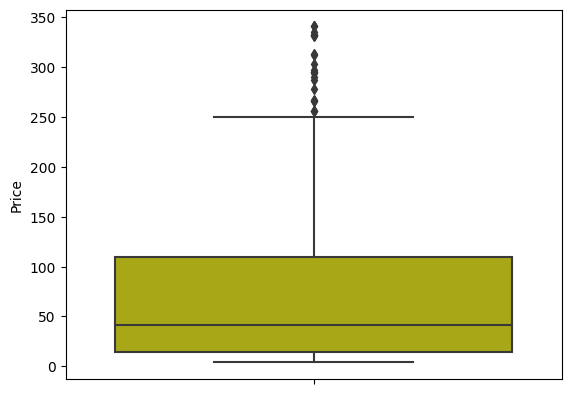

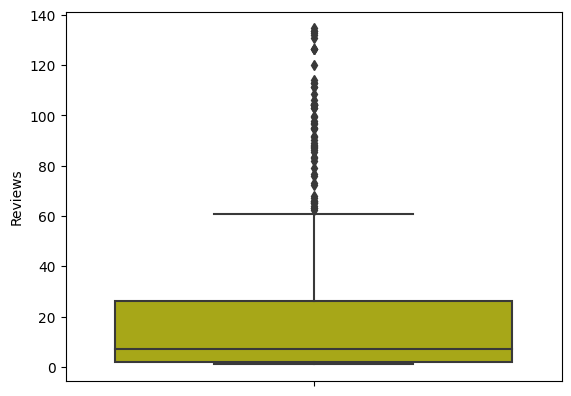

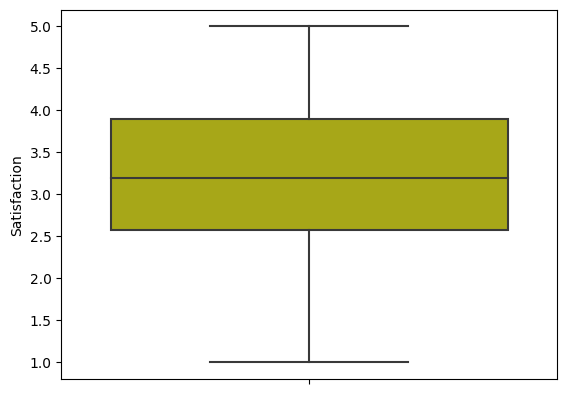

In [20]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color='y')
        plt.show()

In [21]:
df.isnull().sum()

Condition         0
Drug              0
EaseOfUse         0
Effective         0
Form              0
Indication        0
Price            48
Reviews         101
Satisfaction      0
Type              0
dtype: int64

In [22]:
df.dropna(inplace=True)

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Multivariate Analysis
    </h2>
</div>

## PIE-CHART

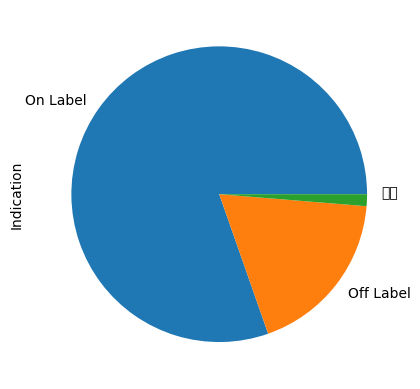

In [23]:
df.Indication.value_counts().plot.pie();

In [24]:
df.columns

Index(['Condition', 'Drug', 'EaseOfUse', 'Effective', 'Form', 'Indication',
       'Price', 'Reviews', 'Satisfaction', 'Type'],
      dtype='object')

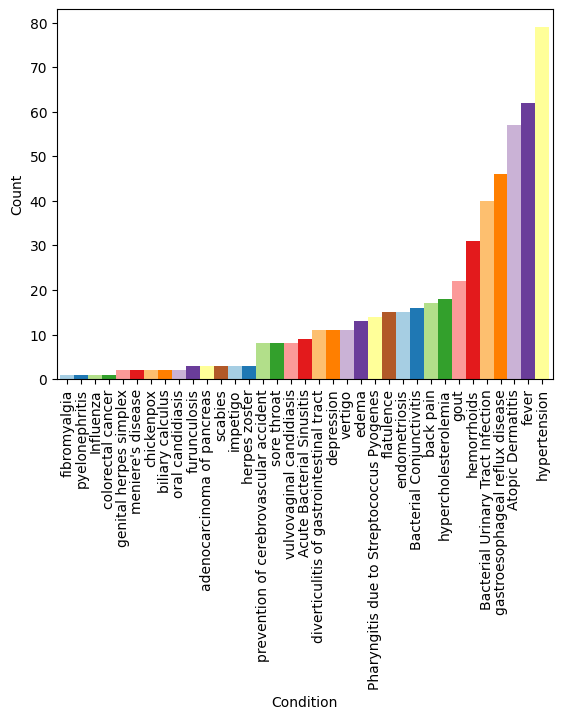

In [25]:
df.groupby("Condition").size().sort_values().plot(kind = "bar" , width = 1 ,color = sns.color_palette('Paired'))
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

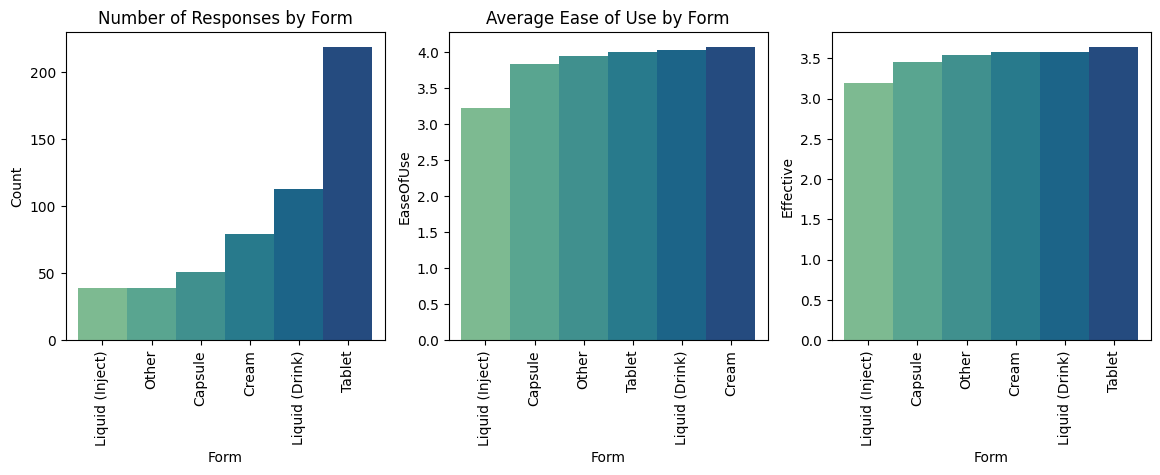

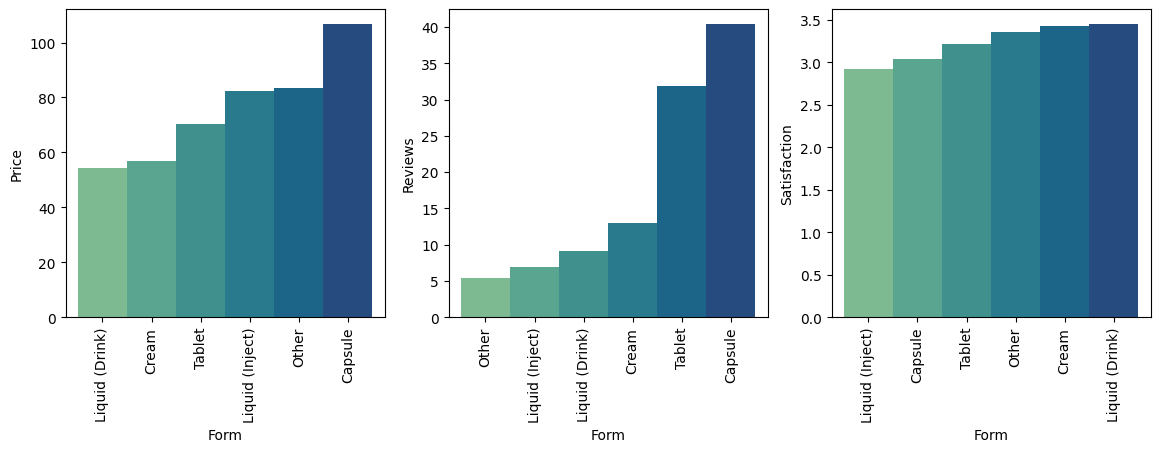

In [26]:
group1 = df.groupby("Form")

fig, (ax1, ax2 ,ax3) = plt.subplots(ncols=3, figsize=(14, 4))

group1.size().sort_values().plot(kind="bar", width=1, color=sns.color_palette('crest'), ax=ax1)
ax1.set_xlabel("Form")
ax1.set_ylabel("Count")
ax1.set_title("Number of Responses by Form")

group1["EaseOfUse"].mean().sort_values().plot(kind="bar", width=1, color=sns.color_palette('crest'), ax=ax2)
ax2.set_xlabel("Form")
ax2.set_ylabel("EaseOfUse")
ax2.set_title("Average Ease of Use by Form")

group1["Effective"].mean().sort_values().plot(kind = "bar" , width = 1 ,color = sns.color_palette('crest') , ax = ax3)
ax3.set_xlabel("Form")
ax3.set_ylabel("Effective")

fig, (ax1 , ax2 , ax3) = plt.subplots(ncols=3, figsize=(14, 4))
group1["Price"].mean().sort_values().plot(kind = "bar" , width = 1 ,color = sns.color_palette('crest') , ax =ax1)
ax1.set_xlabel("Form")
ax1.set_ylabel("Price")

group1["Reviews"].mean().sort_values().plot(kind = "bar" , width = 1 ,color = sns.color_palette('crest') , ax =ax2)
ax2.set_xlabel("Form")
ax2.set_ylabel("Reviews")

group1["Satisfaction"].mean().sort_values().plot(kind = "bar" , width = 1 ,color = sns.color_palette('crest') , ax =ax3)
ax3.set_xlabel("Form")
ax3.set_ylabel("Satisfaction")
plt.show()

# BARPLOT

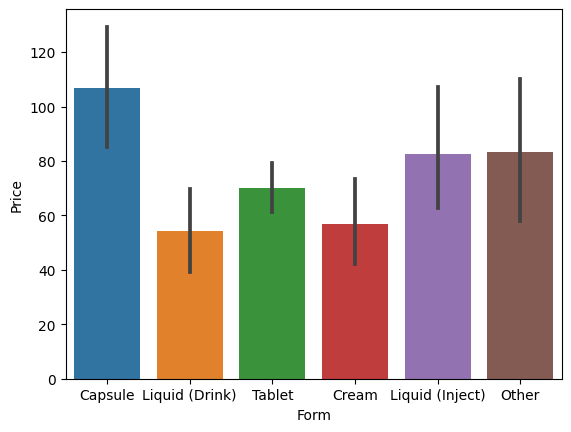

In [27]:
sns.barplot(x='Form',y='Price',data=df);

## DISTPLOT

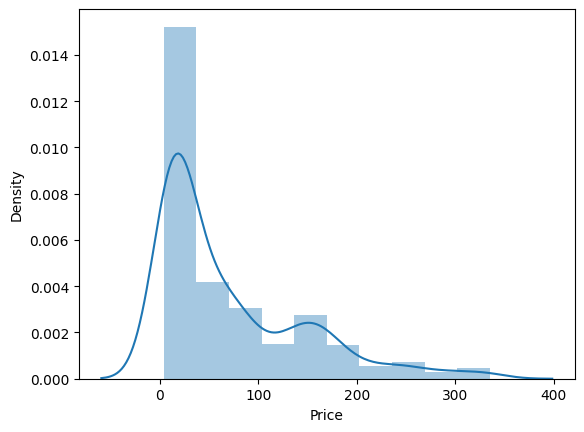

In [28]:
sns.distplot(df['Price'],kde=True,bins=10);

## LINEPLOT

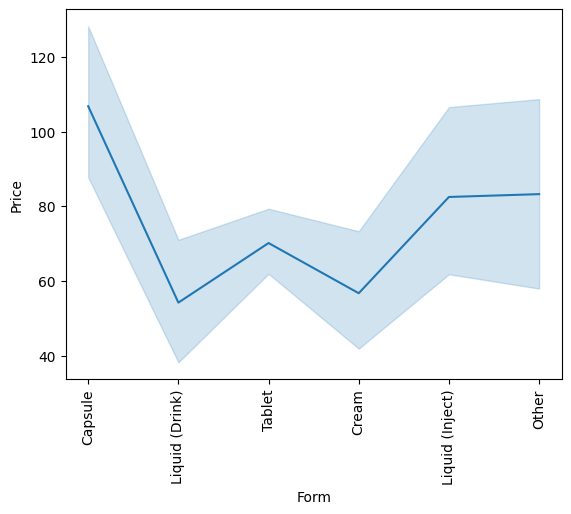

In [29]:
sns.lineplot(x='Form',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

## SCATTERPLOT

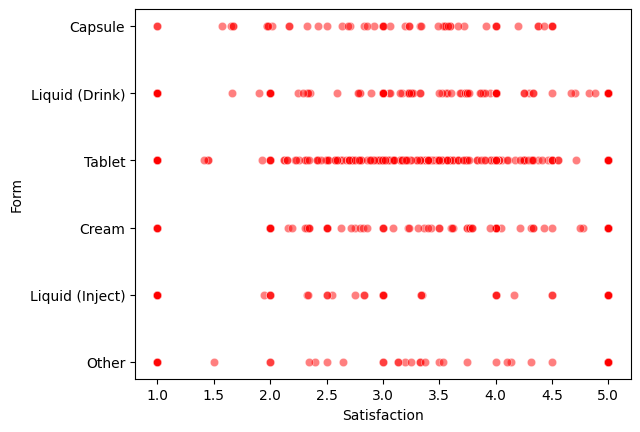

In [30]:
sns.scatterplot(y='Form',x='Satisfaction',alpha=0.5,color='red',data=df);

## JOINTPLOT

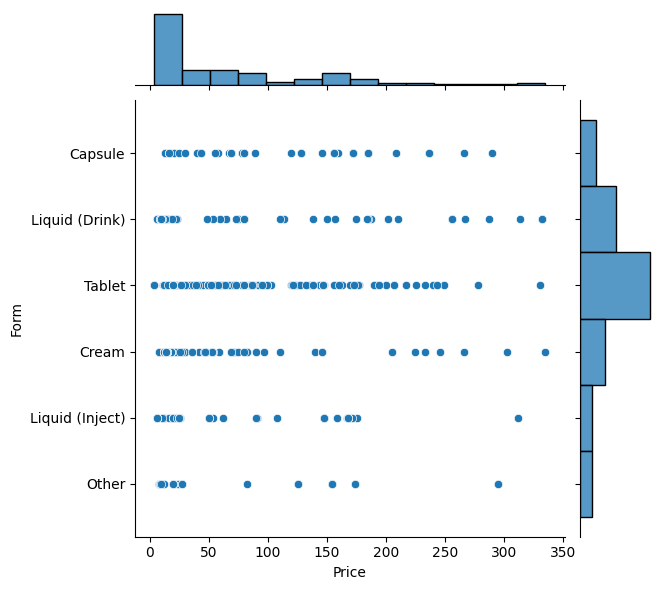

In [31]:
sns.jointplot(x='Price',y='Form',data=df);

## PAIRPLOT

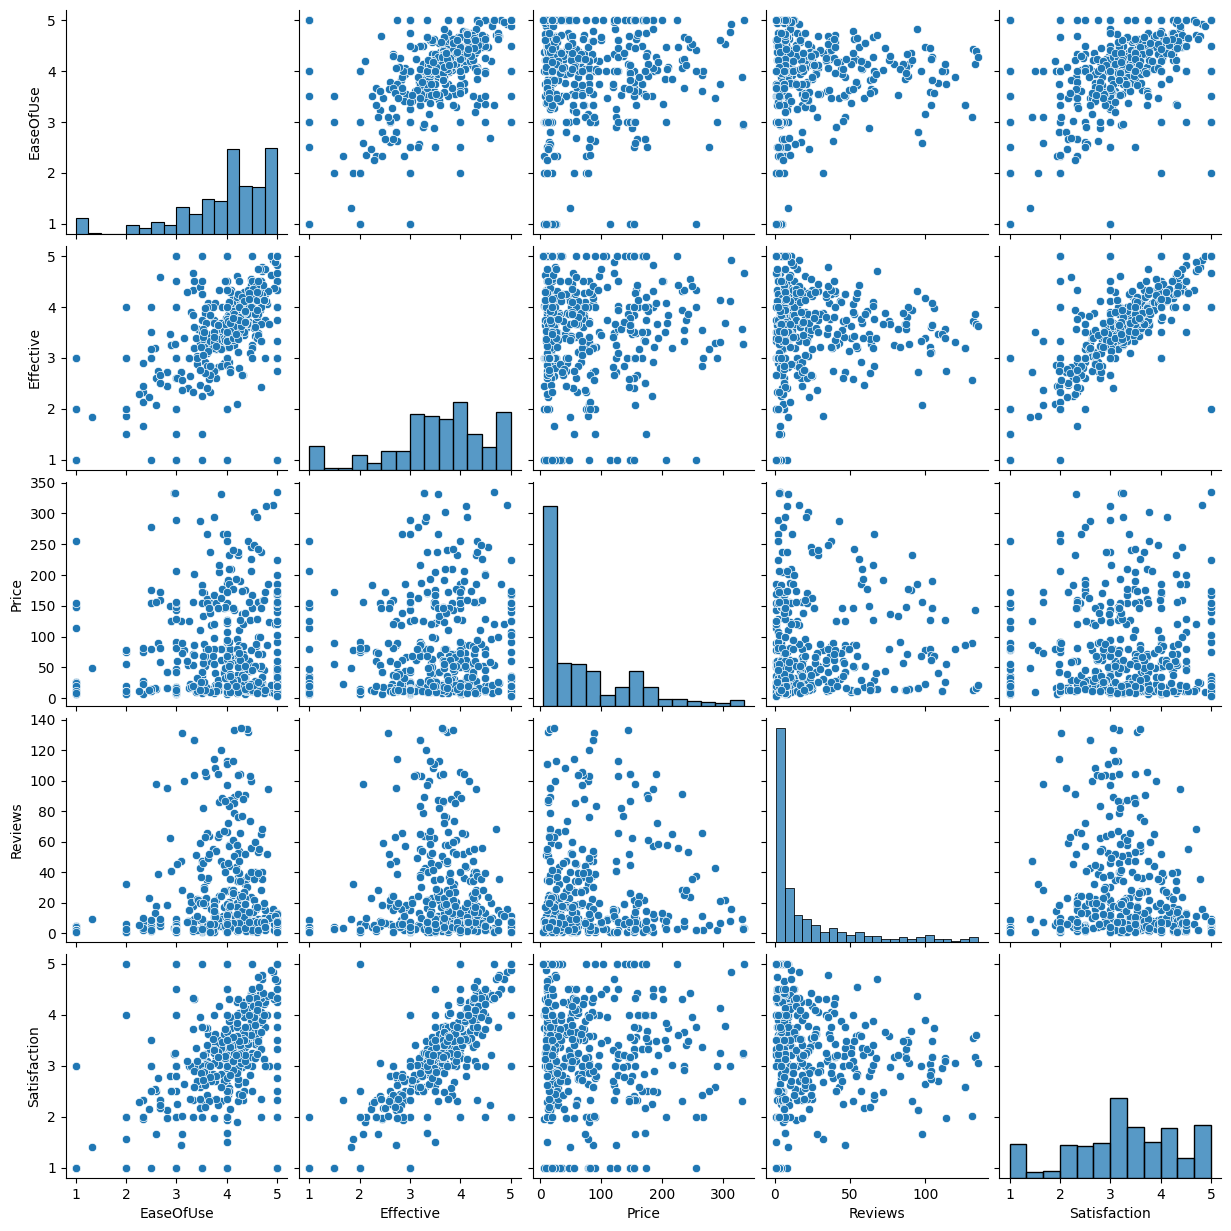

In [32]:
sns.pairplot(data=df)
plt.show()

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Correlation Matrices 
    </h2>
</div>

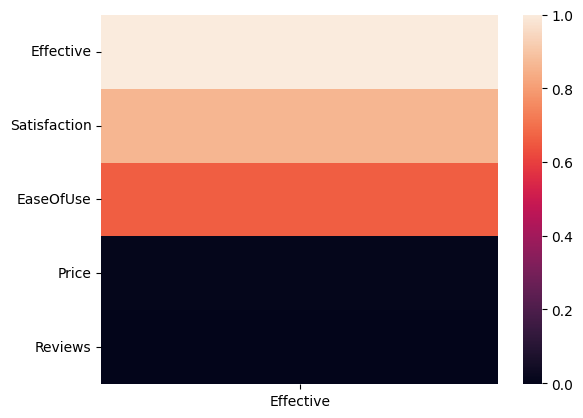

In [48]:
sns.heatmap(df.corr()[['Effective']].sort_values(by='Effective', ascending=False));

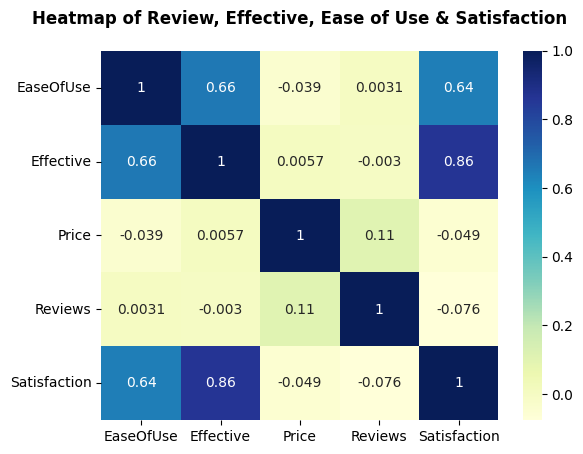

In [34]:
corr_heat = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

corr_heat.set_title('Heatmap of Review, Effective, Ease of Use & Satisfaction', y=1.05, fontweight='heavy')

plt.yticks(rotation=0)
plt.show()

### The majority of the feature produce a positive correlation. The highest one to note is between the satisfaction feature and the effective feature. Which means that there is a probability that the higher the effectiveness of a drug to treat a certain condition, the higher the person will be satisfied.

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Feature Scaling
    </h2>
</div>

In [35]:
x=df[['Satisfaction','EaseOfUse']].values
y=df[['Effective']].values

In [36]:
sc=StandardScaler()

In [37]:
x=sc.fit_transform(x)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Model Building Cross Validation
    </h2>
</div>

In [49]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=10, n_jobs=-1)
    print("cross validation model : {}".format(name))
    Average_score = np.mean(scores)
    print("Average score: ", Average_score)
    print("*"*100)

cross validation model : LinearRegression
Average score:  0.7384878832112675
****************************************************************************************************
cross validation model : Ridge
Average score:  0.7385946523095646
****************************************************************************************************
cross validation model : LinearSVR
Average score:  0.7297078623601175
****************************************************************************************************
cross validation model : DecisionTreeRegressor
Average score:  0.639002762961613
****************************************************************************************************
cross validation model : GradientBoostingRegressor
Average score:  0.7360351262076117
****************************************************************************************************
cross validation model : AdaBoostRegressor
Average score:  0.7087797145113441
*************************************

# LINEAR REGRESSION

In [52]:
LR =  LinearRegression()

In [53]:
LR.fit(x_train, y_train)

LinearRegression()

In [54]:
y_pred = LR.predict(x)

In [55]:
PREDICTION = pd.DataFrame(zip(y, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,3.655882,3.487766
1,3.290000,2.984215
2,3.000000,1.587667
3,3.000000,3.243624
4,3.000000,3.201596
...,...,...
535,2.708571,2.714888
536,2.770000,2.806261
537,3.000000,3.495789
538,1.000000,1.923887


<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        DATA VISUALISATION
    </h2>
</div>

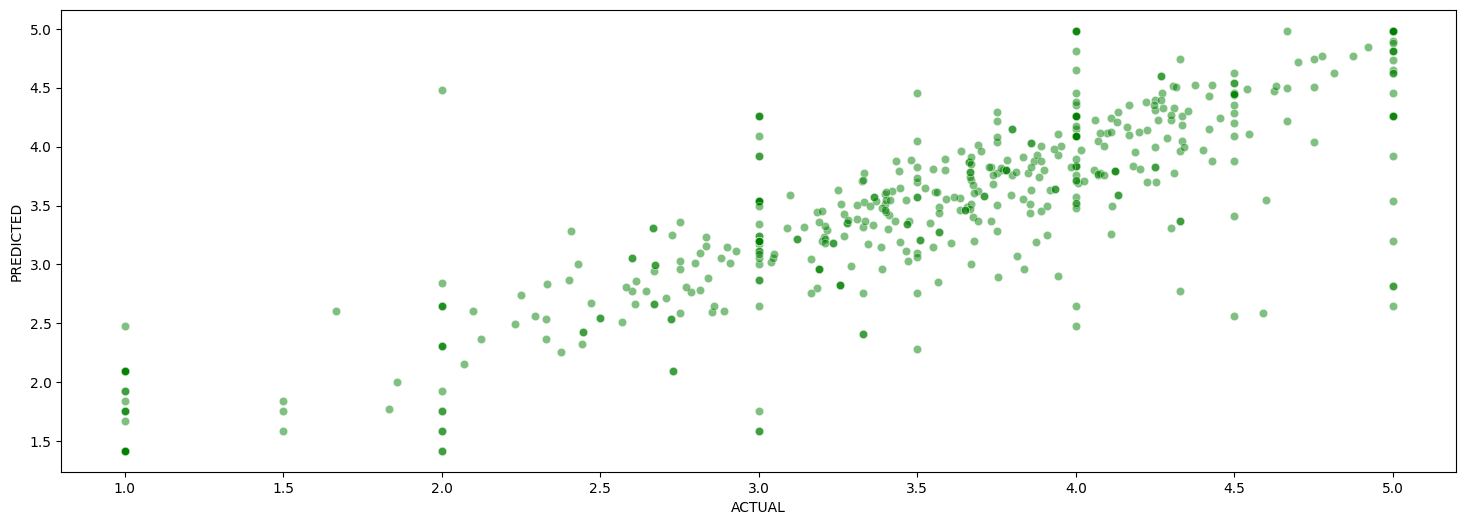

In [56]:
plt.figure(figsize=(18,6))
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED',alpha=0.5,color='green')
plt.show()

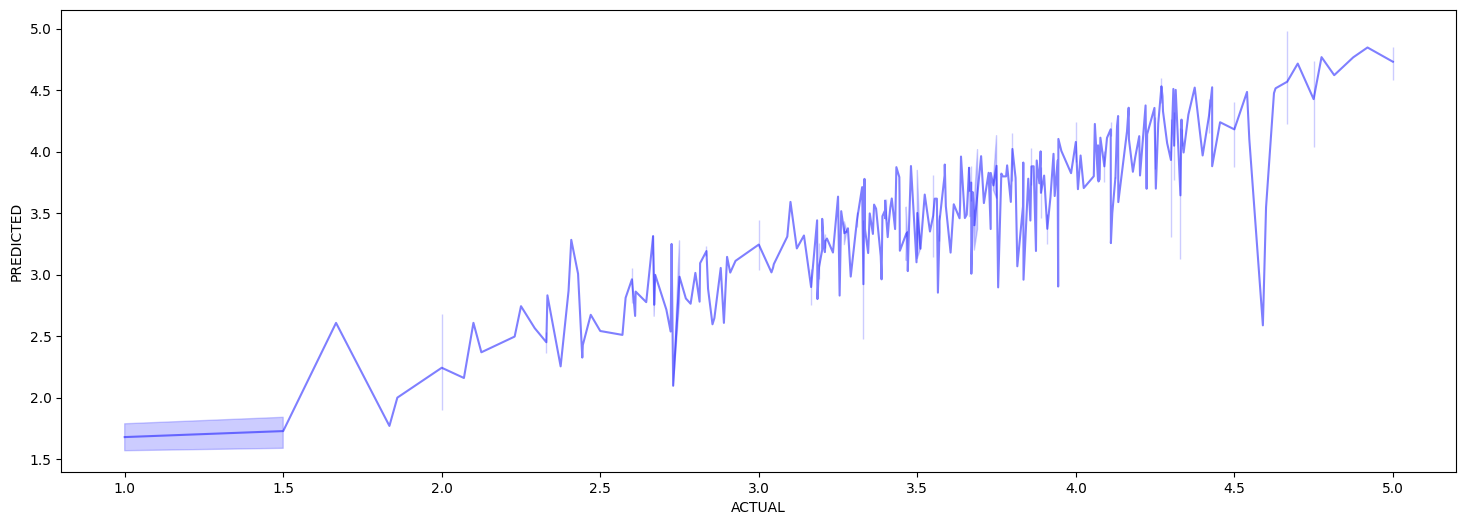

In [57]:
plt.figure(figsize=(18,6))
sns.lineplot(data=PREDICTION, x='ACTUAL',y='PREDICTED',alpha=0.5,color='blue')
plt.show()

<div style="background-color:#e6e6ff;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
    CONCLUSION
</div>

IN THIS DATA ANALYSIS WE USE LINEAR REGRESSION ,WE DID EXTENSIVE ANALYSIS OF INPUT DATA AND WERE ABLE TO ACHIEVE TEST ACCURACY OF ABOVE 70%

<div style="background-color:
#5499c7 ;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
    THE END
</div>